In [1]:
import os
import argparse
import math
from decimal import Decimal
from os.path import join

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy.stats
import pandas as pd
from tqdm import tqdm

import glob as glob
import nibabel as nib
from scipy.stats import t as t_dist
from tractseg.libs import plot_utils
from sklearn.linear_model import LinearRegression
import dipy as dp
from dipy.io.image import load_nifti, save_nifti
from dipy.denoise.patch2self import patch2self

In [2]:
STUDY_PATH='/NAS/deathrow/mri_data/test_NAILA/Tests_Dti_Multi_Shells/'
IMAGES_DIR=os.path.join(STUDY_PATH,'images')
TRACTO_DIR=os.path.join(STUDY_PATH,'tracto')
FILE_PATH=os.path.join(STUDY_PATH,'liste_pts.csv')

In [3]:
BValFile=sorted(glob.glob(os.path.join(STUDY_PATH,'data','dipy_data_accelerator','*.bval')))

In [36]:
data, affine = load_nifti(BValFile[1].replace('bval','nii.gz'))
bvals = np.loadtxt(BValFile[1])
denoised_arr = patch2self(data, bvals,verbose=True)

Denoised b0 Volume:  0
Denoised b0 Volume:  1
Denoised b0 Volume:  2
Denoised b0 Volume:  3
Denoised b0 Volume:  4
Denoised b0 Volume:  5
Denoised b0 Volume:  6
Denoised b0 Volume:  7
Denoised b0 Volume:  8
Denoised b0 Volume:  9
Denoised b0 Volume:  10
Denoised DWI Volume:  0
Denoised DWI Volume:  1
Denoised DWI Volume:  2
Denoised DWI Volume:  3
Denoised DWI Volume:  4
Denoised DWI Volume:  5
Denoised DWI Volume:  6
Denoised DWI Volume:  7
Denoised DWI Volume:  8
Denoised DWI Volume:  9
Denoised DWI Volume:  10
Denoised DWI Volume:  11
Denoised DWI Volume:  12
Denoised DWI Volume:  13
Denoised DWI Volume:  14
Denoised DWI Volume:  15
Denoised DWI Volume:  16
Denoised DWI Volume:  17
Denoised DWI Volume:  18
Denoised DWI Volume:  19
Denoised DWI Volume:  20
Denoised DWI Volume:  21
Denoised DWI Volume:  22
Denoised DWI Volume:  23
Denoised DWI Volume:  24
Denoised DWI Volume:  25
Denoised DWI Volume:  26
Denoised DWI Volume:  27
Denoised DWI Volume:  28
Denoised DWI Volume:  29
Denois

In [ ]:
data, affine = load_nifti(BValFile[1].replace('bval','nii.gz'))
bvals = np.loadtxt(BValFile[1])
denoised_arr = patch2self(data, bvals, model='OLS',verbose=True)

Denoised b0 Volume:  0
Denoised b0 Volume:  1
Denoised b0 Volume:  2
Denoised b0 Volume:  3
Denoised b0 Volume:  4
Denoised b0 Volume:  5
Denoised b0 Volume:  6
Denoised b0 Volume:  7
Denoised b0 Volume:  8
Denoised b0 Volume:  9
Denoised b0 Volume:  10
Denoised DWI Volume:  0
Denoised DWI Volume:  1
Denoised DWI Volume:  2
Denoised DWI Volume:  3
Denoised DWI Volume:  4
Denoised DWI Volume:  5
Denoised DWI Volume:  6
Denoised DWI Volume:  7
Denoised DWI Volume:  8
Denoised DWI Volume:  9
Denoised DWI Volume:  10
Denoised DWI Volume:  11
Denoised DWI Volume:  12
Denoised DWI Volume:  13
Denoised DWI Volume:  14
Denoised DWI Volume:  15
Denoised DWI Volume:  16
Denoised DWI Volume:  17
Denoised DWI Volume:  18
Denoised DWI Volume:  19
Denoised DWI Volume:  20
Denoised DWI Volume:  21
Denoised DWI Volume:  22
Denoised DWI Volume:  23
Denoised DWI Volume:  24
Denoised DWI Volume:  25
Denoised DWI Volume:  26
Denoised DWI Volume:  27
Denoised DWI Volume:  28
Denoised DWI Volume:  29
Denois

seq_MB4_111dirs denoised_patch2self.png


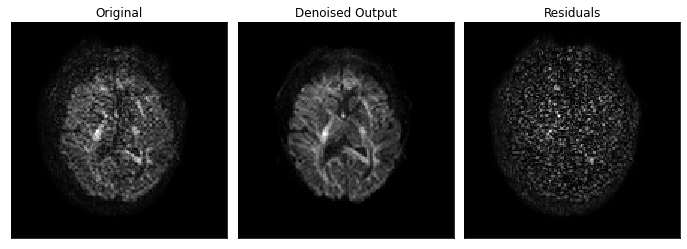

In [37]:
# Gets the center slice and the middle volume of the 4D diffusion data.
sli = data.shape[2] // 2
gra = 12  # pick out a random volume for a particular gradient direction

orig = data[:, :, sli, gra]
den = denoised_arr[:, :, sli, gra]

# computes the residuals
rms_diff = np.sqrt((orig - den) ** 2)

fig1, ax = plt.subplots(1, 3, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig1.subplots_adjust(hspace=0.3, wspace=0.05)

ax.flat[0].imshow(orig.T, cmap='gray', interpolation='none',
                  origin='lower')
ax.flat[0].set_title('Original')
ax.flat[1].imshow(den.T, cmap='gray', interpolation='none',
                  origin='lower')
ax.flat[1].set_title('Denoised Output')
ax.flat[2].imshow(rms_diff.T, cmap='gray', interpolation='none',
                  origin='lower')
ax.flat[2].set_title('Residuals')

fig1.savefig('denoised_patch2self_seq_MB4_111dirs.png')

print("seq_MB4_111dirs denoised_patch2self.png")

The result saved in denoised_patch2self.png


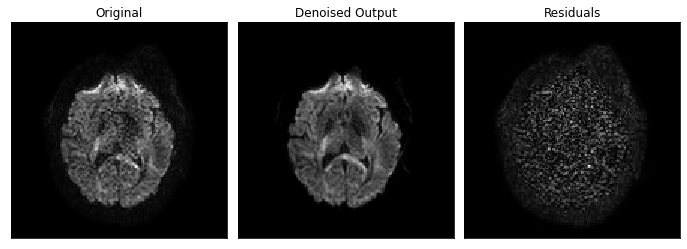

In [22]:
data, affine = load_nifti(BValFile[0].replace('bval','nii.gz'))
bvals = np.loadtxt(BValFile[0])
denoised_arr = patch2self(data, bvals)

# Gets the center slice and the middle volume of the 4D diffusion data.
sli = data.shape[2] // 2
gra = 12  # pick out a random volume for a particular gradient direction

orig = data[:, :, sli, gra]
den = denoised_arr[:, :, sli, gra]

# computes the residuals
rms_diff = np.sqrt((orig - den) ** 2)

fig1, ax = plt.subplots(1, 3, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig1.subplots_adjust(hspace=0.3, wspace=0.05)

ax.flat[0].imshow(orig.T, cmap='gray', interpolation='none',
                  origin='lower')
ax.flat[0].set_title('Original')
ax.flat[1].imshow(den.T, cmap='gray', interpolation='none',
                  origin='lower')
ax.flat[1].set_title('Denoised Output')
ax.flat[2].imshow(rms_diff.T, cmap='gray', interpolation='none',
                  origin='lower')
ax.flat[2].set_title('Residuals')

fig1.savefig('denoised_patch2self_seq_MB3_89dirs.png')

print("The result saved in denoised_patch2self.png")

In [4]:
data, affine = load_nifti(BValFile[0].replace('bval','nii.gz'))
denoised_arr, affine_arr = load_nifti(os.path.join(STUDY_PATH,'results','8_25_45_MB3','Denoise_DWI','8_25_45_MB3__dwi_denoised.nii.gz'))

# Gets the center slice and the middle volume of the 4D diffusion data.
sli = data.shape[2] // 2
gra = 12  # pick out a random volume for a particular gradient direction

orig = data[:, :, sli, gra]
den = denoised_arr[:, :, sli, gra]

# computes the residuals
rms_diff = np.sqrt((orig - den) ** 2)

fig1, ax = plt.subplots(1, 3, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig1.subplots_adjust(hspace=0.3, wspace=0.05)

ax.flat[0].imshow(orig.T, cmap='gray', interpolation='none',
                  origin='lower')
ax.flat[0].set_title('Original')
ax.flat[1].imshow(den.T, cmap='gray', interpolation='none',
                  origin='lower')
ax.flat[1].set_title('Denoised Output')
ax.flat[2].imshow(rms_diff.T, cmap='gray', interpolation='none',
                  origin='lower')
ax.flat[2].set_title('Residuals')

fig1.savefig('denoised_dwidenoise_seq_MB3_96dirs.png')

print("seq_MB3_96dirs_denoised_dwidenoise.png")

FileNotFoundError: No such file or no access: '/NAS/deathrow/mri_data/test_NAILA/Tests_Dti_Multi_Shells/results/8_25_45_MB3/Denoise_DWI/8_25_45_MB3__dwi_denoised.nii.gz'

In [25]:
!ls /NAS/deathrow/mri_data/test_NAILA/Tests_Dti_Multi_Shells/results/8_25_45_MB3/Denoise_DWI/8_25_45_MB3__dwi_denoised.nii.gz

/NAS/deathrow/mri_data/test_NAILA/Tests_Dti_Multi_Shells/results/8_25_45_MB3/Denoise_DWI/8_25_45_MB3__dwi_denoised.nii.gz


In [33]:
test=glob.glob(os.path.join(STUDY_PATH,'results','8_25_45_MB3','Denoise_DWI','*.nii.gz'))
data, affine = load_nifti(test[0])

FileNotFoundError: No such file or no access: '/NAS/deathrow/mri_data/test_NAILA/Tests_Dti_Multi_Shells/results/8_25_45_MB3/Denoise_DWI/8_25_45_MB3__dwi_denoised.nii.gz'

In [31]:
print(test[0])

/NAS/deathrow/mri_data/test_NAILA/Tests_Dti_Multi_Shells/results/8_25_45_MB3/Denoise_DWI/8_25_45_MB3__dwi_denoised.nii.gz
